## Google stock price prediction usin Bidirectional LSTM

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
##Import the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib import rcParams

tf.random.set_seed(20)
np.random.seed(10)

**Reading the data**

In [3]:
df_train = pd.read_csv('/content/gdrive/My Drive/google/trainset.csv')
df_test = pd.read_csv('/content/gdrive/My Drive/google/testset.csv')

In [4]:
# Sort DataFrame by date
df_train = df_train.sort_values('Date')

#check the result
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
#drop NANs
df_train = df_train.dropna()
df_test = df_test.dropna()

print(df_train.shape)
print(df_test.shape)

(1259, 7)
(125, 7)


<function matplotlib.pyplot.show>

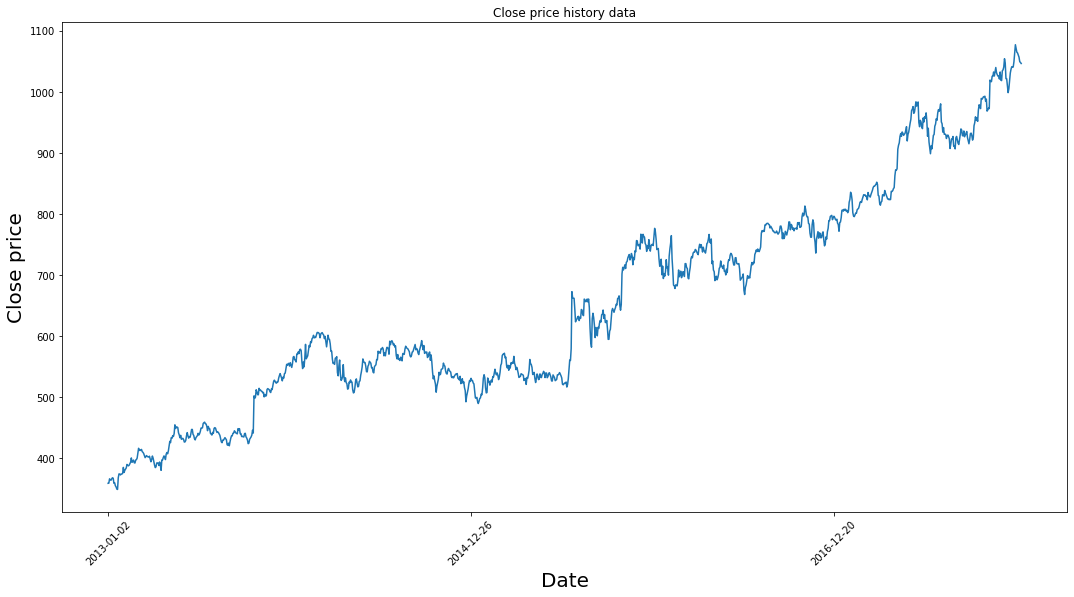

In [6]:
## Visulaizing close price on graph from historical data
plt.figure(figsize=(18,9))
plt.title('Close price history data')
plt.plot(df_train['Close'])
plt.xticks(range(0,df_train.shape[0],500),df_train['Date'].loc[::500],rotation=45)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close price',fontsize=20)
plt.show

**draw features distribution**

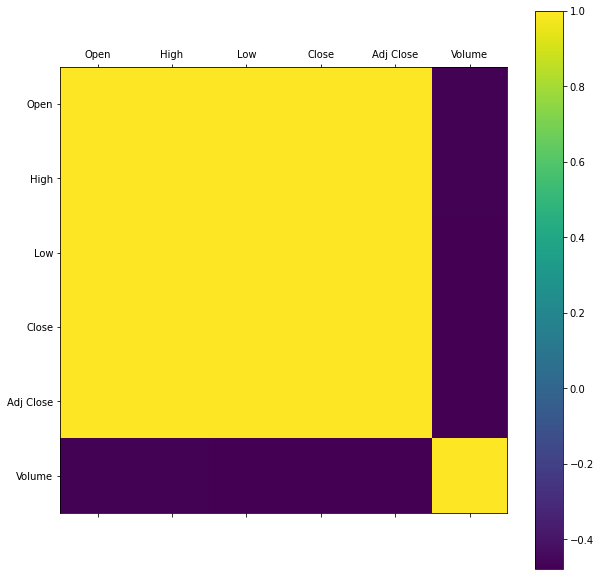

In [7]:
scaling_data_frame = df_train.filter(['Open','High','Low','Close','Adj Close','Volume'])

## Scaling the features
scaler = MinMaxScaler(feature_range=(0,1))

## Transform the data into
scaled_Data = scaler.fit_transform(scaling_data_frame)

## Display the scaled features into dataframe
scaled_data_frame = pd.DataFrame(data=scaled_Data, index=[df_train.Date], columns=['Open','High','Low','Close','Adj Close','Volume'] )

## Feature Scaling and visualization of feature distribution
rcParams['figure.figsize'] = 20, 10
plt.matshow(df_train.corr())
plt.yticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
plt.xticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
plt.colorbar()

In [8]:
## Create a seperate dataframe with only colse column
close_trainData = df_train.filter(['Close'])

## Convert created dataframe into numpy array
StockTrainData = close_trainData.values

In [9]:
## Scaling the data into range 0,1
sc = MinMaxScaler(feature_range = (0,1))

## Transform the data
StockTrainData = sc.fit_transform(StockTrainData)

In [10]:
## Spliting the dataset into two parts such as Xtrain and Ytrain datasets
x_train = []
y_train = []

for i in range(60,len(StockTrainData)):
    x_train.append(StockTrainData[i-60:i, 0])
    y_train.append(StockTrainData[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
## Reshape the Xtrain data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1199, 60, 1)

**Create and compile the model**

In [12]:
regressor = Sequential()

regressor.add(Bidirectional(LSTM(units = 50,return_sequences = True, input_shape = (x_train.shape[1],1))))
regressor.add(Dropout(0.2))

regressor.add(Bidirectional(LSTM(units = 50,return_sequences = True)))
regressor.add(Dropout(0.2))

regressor.add(Bidirectional(LSTM(units = 50)))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

**Train the model**

In [13]:
## Fiting model with given training dataset
history_data = regressor.fit(x_train,y_train, batch_size=32, epochs=100, verbose=2, validation_split=0.1)

Epoch 1/100
34/34 - 39s - loss: 0.0188 - val_loss: 0.0099
Epoch 2/100
34/34 - 1s - loss: 0.0027 - val_loss: 0.0015
Epoch 3/100
34/34 - 1s - loss: 0.0022 - val_loss: 0.0032
Epoch 4/100
34/34 - 1s - loss: 0.0020 - val_loss: 0.0017
Epoch 5/100
34/34 - 1s - loss: 0.0020 - val_loss: 0.0012
Epoch 6/100
34/34 - 1s - loss: 0.0018 - val_loss: 0.0013
Epoch 7/100
34/34 - 1s - loss: 0.0017 - val_loss: 0.0018
Epoch 8/100
34/34 - 1s - loss: 0.0018 - val_loss: 0.0011
Epoch 9/100
34/34 - 1s - loss: 0.0016 - val_loss: 0.0027
Epoch 10/100
34/34 - 1s - loss: 0.0016 - val_loss: 9.8640e-04
Epoch 11/100
34/34 - 1s - loss: 0.0016 - val_loss: 7.4854e-04
Epoch 12/100
34/34 - 1s - loss: 0.0016 - val_loss: 0.0017
Epoch 13/100
34/34 - 1s - loss: 0.0015 - val_loss: 8.3681e-04
Epoch 14/100
34/34 - 1s - loss: 0.0014 - val_loss: 0.0017
Epoch 15/100
34/34 - 1s - loss: 0.0014 - val_loss: 6.8132e-04
Epoch 16/100
34/34 - 1s - loss: 0.0015 - val_loss: 0.0011
Epoch 17/100
34/34 - 1s - loss: 0.0014 - val_loss: 6.5296e-04
Ep

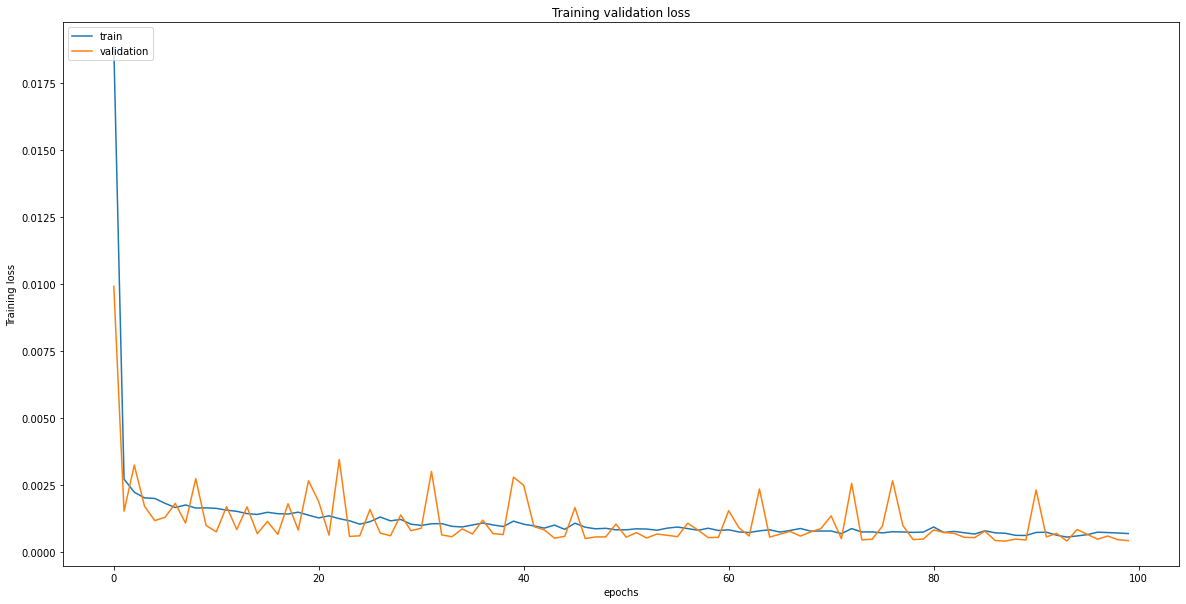

In [14]:
## Visualize train and validation loss
plt.figure(figsize=(20,10))
plt.title('Training validation loss')
plt.plot(history_data.history['loss'])
plt.plot(history_data.history['val_loss'])
plt.ylabel('Training loss')
plt.xlabel('epochs')
plt.legend(['train' , 'validation'], loc = 'upper left')
plt.show()

**Prepare test data**

In [15]:
df_total = pd.concat((df_train['Close'],df_test['Close']),axis = 0)
inputs = df_total[len(df_total) - len(df_test)-60:].values
inputs = inputs.reshape(-1,1)

In [16]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [17]:
x_test = []
Ytest = df_test.iloc[:,1:2].values

for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [18]:
x_test = np.array(x_test)
x_test.shape


(125, 60)

In [19]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

**Test the model on test data**

In [20]:
predicted_price = regressor.predict(x_test)

In [21]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1044.6537 ],
       [1048.5162 ],
       [1056.9807 ],
       [1064.3185 ],
       [1073.827  ],
       [1081.5114 ],
       [1086.0238 ],
       [1087.3544 ],
       [1088.5312 ],
       [1094.0905 ],
       [1098.1366 ],
       [1104.0348 ],
       [1107.7285 ],
       [1112.448  ],
       [1121.0823 ],
       [1131.3708 ],
       [1136.7855 ],
       [1141.8818 ],
       [1146.6577 ],
       [1149.5975 ],
       [1147.8744 ],
       [1147.9197 ],
       [1147.2246 ],
       [1130.5559 ],
       [1101.4136 ],
       [1087.0598 ],
       [1068.6454 ],
       [1042.0403 ],
       [1034.28   ],
       [1035.1521 ],
       [1037.3872 ],
       [1044.9542 ],
       [1056.5204 ],
       [1066.0305 ],
       [1074.3068 ],
       [1082.068  ],
       [1085.6958 ],
       [1093.9753 ],
       [1105.3485 ],
       [1106.5358 ],
       [1103.348  ],
       [1090.8182 ],
       [1084.5898 ],
       [1084.7395 ],
       [1087.3394 ],
       [1094.389  ],
       [1104.7886 ],
       [1122.

In [22]:
## Get RSME(Root Mean Squared Error)
rmse=np.sqrt(np.mean(((predicted_price- Ytest)**2)))
rmse

21.97811616788922

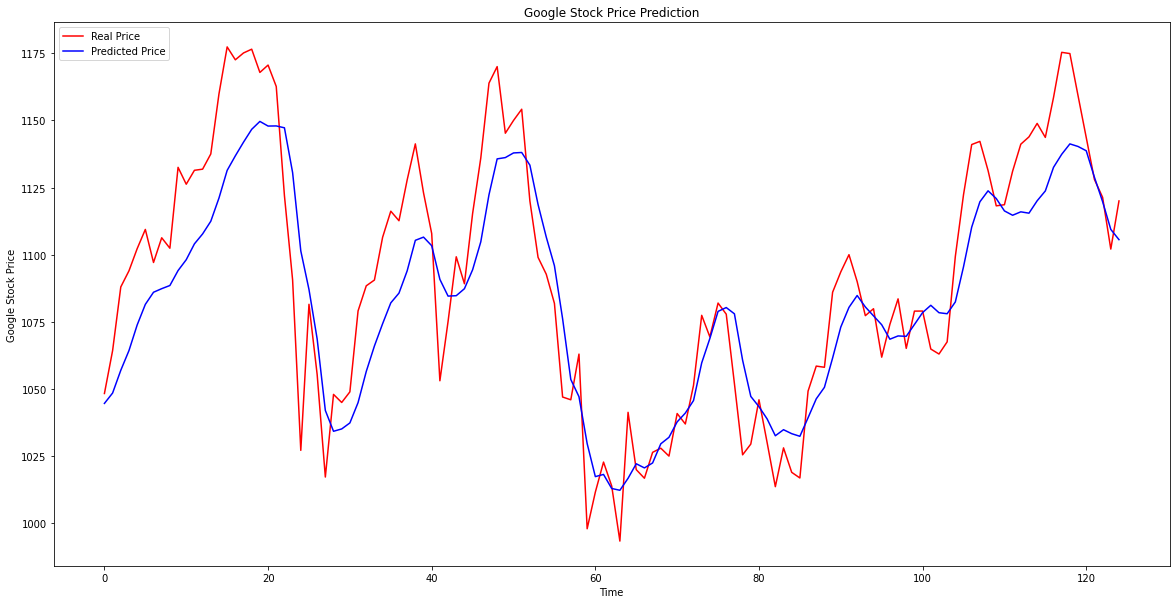

In [23]:
plt.plot(Ytest,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()